# Unir tablas y localizaciones 
Este notebooke es para concentrar y hacer un merge con de la localizacion de las estaciones con las localizaciones de las estaciones de monitoreo

In [72]:
import pandas as pd
import geopandas as gpd 
import shapely


## Carga de datos

Vamos a leer los datos 

In [34]:
estaciones = gpd.read_file('../../../Contaminantes/Estaciones_ubicacion.csv')
estaciones.geometry = estaciones.apply(lambda l: shapely.geometry.Point(float(l.Longitud), float(l.Latitud)), axis=1 )
estaciones.set_crs('EPSG:4326', inplace=True)
estaciones['Altitud']= estaciones['Altitud'].apply(lambda l: int(l.split()[0]))
estaciones.head()

/home/miguel/miniconda3/envs/data/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Estacion              Localidad              Estado    Latitud    Longitud  \
0     ACO                 Acolman  Estado de México    19.635501  -98.912003   
1     AJU                Tlalpan                CDMX   19.154674  -99.162459   
2     AJM                Tlalpan                CDMX     19.2721  -99.207658   
3     ATI   Atizapán de Zaragoza    Estado de México   19.576963  -99.254133   
4     BJU          Benito Juárez                CDMX   19.371612  -99.158969   

   Altitud                    geometry  
0     2198  POINT (-98.91200 19.63550)  
1     2953  POINT (-99.16246 19.15467)  
2     2619  POINT (-99.20766 19.27210)  
3     2341  POINT (-99.25413 19.57696)  
4     2250  POINT (-99.15897 19.37161)

<AxesSubplot: >

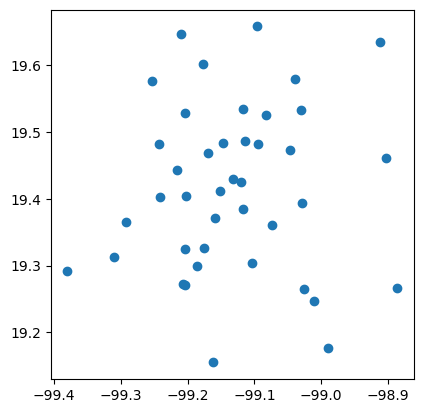

In [25]:

estaciones.plot(aspect=1)

In [26]:
estaciones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [89]:
estaciones.to_csv('../data_s/estaciones.csv', index=False)

Solo nos vamos a quedar con las del valle de mexico y que no sean NaN

In [86]:
contaminantes = pd.read_csv('../../../Contaminantes/PM25/PM_25.csv')
contaminantes = contaminantes[contaminantes.CVE_EST.apply(lambda l: 'ZMVM' in l) ] ### keep mexico central Valley 
contaminantes = contaminantes[contaminantes.VALOR.isna()== False] ### Drop Nan
contaminantes.drop(['Unnamed: 0'], axis=1, inplace=True) ## remove column
contaminantes.reset_index(drop=True,inplace =True) ## reset index

In [87]:
contaminantes.head()

CVE_EST       FECHA  HORA PARAMETRO  VALOR            UNIDAD
0  ACO_ZMVM  2007-06-01     1     pm2.5   17.0  µg/m<sup>3</sup>
1  ACO_ZMVM  2007-06-01     2     pm2.5   11.0  µg/m<sup>3</sup>
2  ACO_ZMVM  2007-06-01     3     pm2.5   16.0  µg/m<sup>3</sup>
3  ACO_ZMVM  2007-06-01     4     pm2.5   23.0  µg/m<sup>3</sup>
4  ACO_ZMVM  2007-06-01     5     pm2.5   26.0  µg/m<sup>3</sup>

Index(['Unnamed: 0', 'CVE_EST', 'FECHA', 'HORA', 'PARAMETRO', 'VALOR',
       'UNIDAD'],
      dtype='object')